# EDA và Feature Engineering

## Setup

Nhập các thư viện cần thiết:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import webbrowser 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from CleanProcess import handle_lat_long
from VisualizeLog import check_coordinates_in_vietnam, visualize_clusters
from OutliersScale import drop_outliers, apply_log_transformation, convert_boolean_to_numeric, apply_floor, compute_rooms, compute_features, transform_housing_data

Thiết lập kích thước và kiểu hình ảnh đầu ra:

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## 1. Tải và khám phá dữ liệu

In [3]:
housing = pd.read_csv('../data/last_close_beta.csv', sep='\t')

Xem sơ qua một chút về cấu trúc dữ liệu:

In [4]:
housing.describe()

,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Số tầng,Diện tích sử dụng,Latitude,Longitude
count,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000,3781.000000,3781.000000
mean,8.498815,70.897294,3.906015,3.827843,3.433202,255.627449,14.490856,106.454189
std,9.771436,49.929774,2.786135,2.667664,2.267868,509.171630,4.823330,0.563304
min,1.050000,4.000000,1.000000,1.000000,1.000000,12.000000,9.187031,103.840727
25%,4.000000,42.000000,3.000000,3.000000,2.000000,115.200000,10.795166,105.860751
50%,5.500000,58.000000,4.000000,4.000000,3.000000,180.000000,10.845403,106.634844
75%,8.790000,80.000000,4.000000,4.000000,4.000000,270.000000,20.983078,106.691169
max,98.000000,490.000000,111.000000,111.000000,64.200000,23433.000000,22.551209,109.209865


Dựa trên mô tả về  `housing` dataset, tôi sẽ đưa ra một số nhận xét như sau:

+ Phạm vi `Price`: Giá nhà có sự biến động lớn với giá trị trung bình khoảng $8.5$ tỷ VND, khoảng cách giữa `min = 1.05` và `max = 98` quá lớn cùng với độ lệch chuẩn cao trong khoảng $9.8$ tỷ VND.
+ Kích Thước & Cấu Trúc: Các cột `Diện tích (m2)`, `Số phòng ngủ`, `Số phòng WC` và `Số tầng` cung cấp thông tin về kích thước và cấu trúc của bất động sản, bao gồm cả diện tích sử dụng. Dựa trên số liệu mô tả, ta thấy được sự đa dạng về cấu trúc và kích thước của các căn nhà.
+ Vị Trí Địa Lý: Các cột `Latitude` và `Longitude` cho biết tọa độ địa lý của bất động sản, có thể hữu ích cho việc phân tích thị trường theo khu vực.

Tiếp theo, tôi sẽ thực hiện một số phân tích bằng cách trực quan hóa dữ liệu bằng biểu đồ cột:

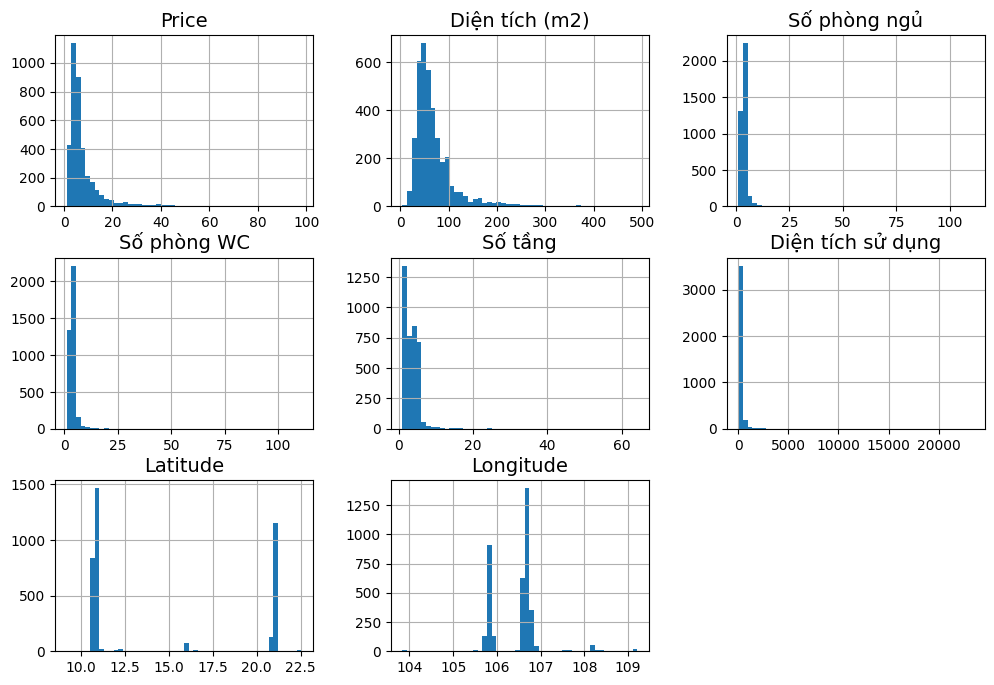

In [5]:
housing.hist(bins=50, figsize=(12, 8))

Nhìn vào biểu đồ này, tôi nghĩ dữ liệu dường như đang tồn đọng rất nhiều rủi ro về giá trị rác. Điều này có thể là do dữ liệu bị thiếu hoặc do người dùng cung cấp thông tin thiếu chính xác. Để xác định rõ hơn, tôi sẽ kiểm tra xem có bao nhiêu giá trị bị thiếu trong dữ liệu.

Kiểm tra xem có giá trị null không:

In [6]:
housing.isnull().sum() 

Title                   1
Price                   0
Links                   1
Diện tích (m2)          0
Số phòng ngủ            0
Số phòng WC             0
Địa chỉ              1598
Description             0
Chỗ để xe hơi           0
Đang cho thuê           0
CSVC xung quanh         0
Mặt tiền                0
Số tầng                 0
ExtractedTitle         15
Diện tích sử dụng       0
Address.1               7
Latitude               26
Longitude              26
dtype: int64

Như bạn có thể thấy, số lượng giá trị null khá nhiều ở cột Địa chỉ. Ta cũng cần lưu ý xử lý giá trị null ở `Address.1`, `Latitude`, `Longitude` và `ExtractedTitle`.

## 2. Xử lý và làm sạch dữ liệu

Để giải quyết vấn đề này, tôi sẽ thực hiện các bước tiền xử lý dữ liệu bằng cách loại bỏ và thay thế  giá trị bị thiếu hoặc giá trị null:

In [7]:
# Drop missing values and the duplicated data based on `Latitude` and `Longitude`
handle_lat_long(housing)
housing

,Title,Price,Links,Diện tích (m2),Số phòng ngủ,Số phòng WC,Địa chỉ,Description,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Mặt tiền,Số tầng,ExtractedTitle,Diện tích sử dụng,Address.1,Latitude,Longitude
0,"BÁN NHÀ HẺM XE HƠI ĐẬU CỬA ĐƯỜNG THỐNG NHẤT ,P...",5.2,https://batdongsan.vn/ban-nha-hem-xe-hoi-dau-c...,80,4.0,3.0,thong nhat.go vap,????????????????????????????????????chốt ngay ...,False,False,False,True,2.0,"đường Thống Nhất, Phường 16, Quận Gò Vấp",160.0,"đường Thống Nhất, Phường 16, Quận Gò Vấp",10.845619,106.664794
1,HXH 1 sẹc Đường số 3 Phường 9 Quận Gò Vấp...,4.5,https://batdongsan.vn/hxh-1-sec-duong-so-3-phu...,42,2.0,2.0,Đường Số 3,ms 29923\n* vị trí: gần ub phường 9. đường số ...,False,False,False,False,3.0,"đường số 3, Phường 9, Quận Gò Vấp",126.0,"đường số 3, Phường 9, Quận Gò Vấp",10.846876,106.651269
2,Bán nhà Xuân Đỉnh. 4.3 Tỷ. ô tô 4 chỗ đỗ cổng....,4.3,https://batdongsan.vn/ban-nha-xuan-dinh-43-ty-...,39,4.0,4.0,Xuân Đỉnh. Bắc Từ Liêm. Hà Nội,chính chủ bán nhà ngõ 277 xuân đỉnh\nvài bước ...,True,False,False,False,5.0,ngõ 277 Xuân Đỉnh,195.0,Xuân Đỉnh. Bắc Từ Liêm. Hà Nội,21.073970,105.790872
3,"3.2 Tỷ, nhà 4 tầng Thụy Khuê. ô tô đỗ cửa. Kin...",3.2,https://batdongsan.vn/32-ty-nha-4-tang-thuy-kh...,30,4.0,4.0,"Thụy Khuê, Ba Đình, Hà Nội",3.2 tỷ ???? có ngay 30m nhà 3 tầng phố thụy kh...,False,False,False,False,2.4,"phố Thụy Khuê, Tây Hồ",72.0,"Thụy Khuê, Ba Đình, Hà Nội",21.046133,105.824627
4,"BÁN NHÀ HXH LẠC LONG QUÂN, TÂN BÌNH - 55M - 4 ...",4.8,https://batdongsan.vn/ban-nha-hxh-lac-long-qua...,55,4.0,3.0,Thành phố Hồ Chí Minh,"mô tả:\n???? kết cấu: 1 trệt 2 lầu sân thượng,...",True,False,True,False,4.0,"đường Lạc Long Quân, Phường Tân Bình",220.0,"đường Lạc Long Quân, Phường Tân Bình",10.774058,106.647478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,Bán Nhà Kim Ngưu – Phân Lô Ô Tô – Nở Hậu – Mặt...,14.0,https://batdongsan.vn/ban-nha-kim-nguu-phan-lo...,90,5.0,4.2,NaN,“không mua nhà này thì mua nhà nào”\n\n- bán n...,True,False,True,True,5.0,"Phường Vĩnh Tuy, Quận Hai Bà Trưng",450.0,"Phường Vĩnh Tuy, Quận Hai Bà Trưng",20.998485,105.868663
3790,Cần bán gấp,4.5,https://batdongsan.vn/can-ban-gap-r268672,160,3.0,3.0,đường số 10 khóm 4 phường 4 TP Cà mau,"nhà ngang chợ phường 4, gần ngã 4, thuận tiện ...",True,False,True,False,1.2,"ngang chợ, Phường 4",192.0,đường số 10 khóm 4 phường 4 TP Cà mau,9.187031,105.154011
3799,"Nhà Đẹp Mặt Tiền, 4PN, 4 Toilet,Ngay Tt Thành ...",3.2,https://batdongsan.vn/nha-dep-mat-tien-4pn-4-t...,61,4.0,4.0,"DT 743, BÌnh Chuẩn ,Thuận An, Bình Dương","thông tin căn nhà:\n\ndiện tích: 60,8m2 (4,7x1...",False,False,True,False,1.4,"đường Bình Dương, KĐT Phú Hồng Đạt, Thành Phố ...",85.4,"đường Bình Dương, KĐT Phú Hồng Đạt, Thành Phố ...",10.972752,106.739906
3805,Bán nhà 5 tầng thang máy sịn sò siêu đẹp khu p...,5.9,https://batdongsan.vn/ban-nha-5-tang-thang-may...,48,4.0,5.0,"Bạch Đằng, Thượng Lý, Hồng Bàng, Hải Phòng",nhà xây mới : tại khu phân lô bạch đằng - thượ...,True,False,True,False,5.0,"khu phân lô Bạch Đằng, Thượng Lý, Hồng Bàng, H...",240.0,"khu phân lô Bạch Đằng, Thượng Lý, Hồng Bàng, H...",20.861873,106.666248


Lúc này các cột như `Title`, `Links`, `Địa chỉ`, `Description`, `ExtractedTitle` và `Address.1` không còn cần thiết nữa do chúng đã được trích xuất thành các cột cần thiết nên ta sẽ loại bỏ chúng:

In [8]:
housing.drop(columns=['Title', 'Links', 'Địa chỉ', 'Description', 'ExtractedTitle', 'Address.1'])

,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Mặt tiền,Số tầng,Diện tích sử dụng,Latitude,Longitude
0,5.2,80,4.0,3.0,False,False,False,True,2.0,160.0,10.845619,106.664794
1,4.5,42,2.0,2.0,False,False,False,False,3.0,126.0,10.846876,106.651269
2,4.3,39,4.0,4.0,True,False,False,False,5.0,195.0,21.073970,105.790872
3,3.2,30,4.0,4.0,False,False,False,False,2.4,72.0,21.046133,105.824627
4,4.8,55,4.0,3.0,True,False,True,False,4.0,220.0,10.774058,106.647478
...,...,...,...,...,...,...,...,...,...,...,...,...
3784,14.0,90,5.0,4.2,True,False,True,True,5.0,450.0,20.998485,105.868663
3790,4.5,160,3.0,3.0,True,False,True,False,1.2,192.0,9.187031,105.154011
3799,3.2,61,4.0,4.0,False,False,True,False,1.4,85.4,10.972752,106.739906
3805,5.9,48,4.0,5.0,True,False,True,False,5.0,240.0,20.861873,106.666248


In [9]:
housing.isnull().sum() # Check missing values

Price                0
Diện tích (m2)       0
Số phòng ngủ         0
Số phòng WC          0
Chỗ để xe hơi        0
Đang cho thuê        0
CSVC xung quanh      0
Mặt tiền             0
Số tầng              0
Diện tích sử dụng    0
Latitude             0
Longitude            0
dtype: int64

## 3. Phân tích dữ liệu bằng trực quan hóa và phân cụm

Lọc giá trị `Latitude` và `Longitude` dựa trên bản đồ Việt Nam, thông tin về số liệu được tham khảo từ _[Cổng thông tin: Việt Nam – Wikipedia tiếng Việt](https://vi.wikipedia.org/wiki/C%E1%BB%95ng_th%C3%B4ng_tin:Vi%E1%BB%87t_Nam#:~:text=%C4%90%E1%BA%A5t%20n%C6%B0%E1%BB%9Bc%20Vi%E1%BB%87t%20Nam%20%28t%E1%BB%8Da%20%C4%91%E1%BB%99%20%C4%91%E1%BB%8Ba%20l%C3%BD%3A,D%C6%B0%C6%A1ng%20chi%E1%BA%BFm%20di%E1%BB%87n%20t%C3%ADch%20kho%E1%BA%A3ng%20329.314%20km%202)_. Ta sẽ sử dụng hàm `check_coordinates_in_vietnam` để kiểm tra và gán lại cho `housing`:

In [10]:
# Check whether or not the coordinates are in Vietnam
housing = check_coordinates_in_vietnam(shapefile_path='./vietnam_Vietnam_Country_Boundary/extracted_files/vietnam_Vietnam_Country_Boundary.shp', housing_df=housing)

Tiếp theo, tôi sẽ thực hiện trực quan hóa dữ liệu để hiểu rõ hơn về phân phối của các nhà trên bản đồ:

In [11]:
# Visualize the data
gmap = visualize_clusters(housing)
gmap.save("foliumClusterVisualization.html")

/home/letruongzzio/Desktop/VisualizeLog.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.housing['Cluster'] = kmeans.labels_ # Add the cluster labels to the housing DataFrame
/home/letruongzzio/Desktop/VisualizeLog.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.housing['Distance to center'] = self.housing.apply(


In [12]:
webbrowser.open_new_tab('foliumClusterVisualization.html')

True

In [13]:
housing # new column 'Cluster' and 'Distance to center are added

,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Mặt tiền,Số tầng,Diện tích sử dụng,Latitude,Longitude,Cluster,Distance to center
0,5.2,80,4.0,3.0,False,False,False,True,2.0,160.0,10.845619,106.664794,1,4.527418
1,4.5,42,2.0,2.0,False,False,False,False,3.0,126.0,10.846876,106.651269,1,5.408283
2,4.3,39,4.0,4.0,True,False,False,False,5.0,195.0,21.073970,105.790872,3,6.394044
3,3.2,30,4.0,4.0,False,False,False,False,2.4,72.0,21.046133,105.824627,3,3.131665
4,4.8,55,4.0,3.0,True,False,True,False,4.0,220.0,10.774058,106.647478,1,5.325425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,14.0,90,5.0,4.2,True,False,True,True,5.0,450.0,20.998485,105.868663,3,6.283848
3790,4.5,160,3.0,3.0,True,False,True,False,1.2,192.0,9.187031,105.154011,1,245.925794
3799,3.2,61,4.0,4.0,False,False,True,False,1.4,85.4,10.972752,106.739906,1,19.360219
3805,5.9,48,4.0,5.0,True,False,True,False,5.0,240.0,20.861873,106.666248,0,1.681189


Dựa trên bản đồ phân bổ giá nhà mà ta đã làm, có thể nhận xét như sau:

+ Khu Vực Trung Tâm: Có vẻ như các khu vực trung tâm đô thị có giá nhà cao hơn, được biểu thị bằng màu đỏ và đen. Điều này phản ánh sự tập trung của các tiện ích và dịch vụ, cũng như nhu cầu cao về nhà ở tại những khu vực này.
+ Vùng Ngoại Ô: Các khu vực ngoại ô hoặc xa trung tâm thường có giá nhà thấp hơn, được biểu thị bằng màu xanh. Điều này có thể do khoảng cách xa hơn đến các tiện ích và trung tâm kinh tế, dẫn đến giá nhà phải chăng hơn.
+ Sự Phân Hóa Rõ Rệt: Bản đồ cho thấy sự phân hóa rõ rệt về giá nhà giữa các khu vực khác nhau, điều này có thể liên quan đến các yếu tố như vị trí địa lý, mức độ phát triển hạ tầng, và chất lượng cuộc sống.
+ Cần Thêm Thông Tin để có cái nhìn sâu sắc hơn về thị trường bất động sản, có thể cần thêm thông tin về xu hướng giao dịch, chính sách quy hoạch, và các yếu tố kinh tế vĩ mô.

Xem cách phân phối `Price`:

In [14]:
housing['Price'].describe()

count    2006.000000
mean        9.112557
std        10.523629
min         1.050000
25%         3.950000
50%         5.600000
75%         9.500000
max        98.000000
Name: Price, dtype: float64

Ta sẽ dùng hàm `numpy.log` để chuyển đổi giá trị của `Price`, `Diện tích (m2)` và `Diện tích sử dụng` thành dạng logarit cơ số $e$, với mục đích giúp dữ liệu phân phối đều hơn và giảm thiểu sự chênh lệch quá lớn giữa các giá trị:

In [15]:
housing = apply_log_transformation(housing, ['Price', 'Diện tích (m2)', 'Diện tích sử dụng'])
housing

/home/letruongzzio/Desktop/OutliersScale.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = np.log(df[columns])


,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Mặt tiền,Số tầng,Diện tích sử dụng,Latitude,Longitude,Cluster,Distance to center
0,1.648659,4.382027,4.0,3.0,False,False,False,True,2.0,5.075174,10.845619,106.664794,1,4.527418
1,1.504077,3.737670,2.0,2.0,False,False,False,False,3.0,4.836282,10.846876,106.651269,1,5.408283
2,1.458615,3.663562,4.0,4.0,True,False,False,False,5.0,5.273000,21.073970,105.790872,3,6.394044
3,1.163151,3.401197,4.0,4.0,False,False,False,False,2.4,4.276666,21.046133,105.824627,3,3.131665
4,1.568616,4.007333,4.0,3.0,True,False,True,False,4.0,5.393628,10.774058,106.647478,1,5.325425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,2.639057,4.499810,5.0,4.2,True,False,True,True,5.0,6.109248,20.998485,105.868663,3,6.283848
3790,1.504077,5.075174,3.0,3.0,True,False,True,False,1.2,5.257495,9.187031,105.154011,1,245.925794
3799,1.163151,4.110874,4.0,4.0,False,False,True,False,1.4,4.447346,10.972752,106.739906,1,19.360219
3805,1.774952,3.871201,4.0,5.0,True,False,True,False,5.0,5.480639,20.861873,106.666248,0,1.681189


Lúc này để tìm giá trị thực, ta chỉ cần lấy giá trị mũ $\exp$ của giá trị logarit, xem xét phân phối của `Price`, `Diện tích (m2)` và `Diện tích sử dụng`:

Opening in existing browser session.


<Axes: xlabel='Price', ylabel='Count'>

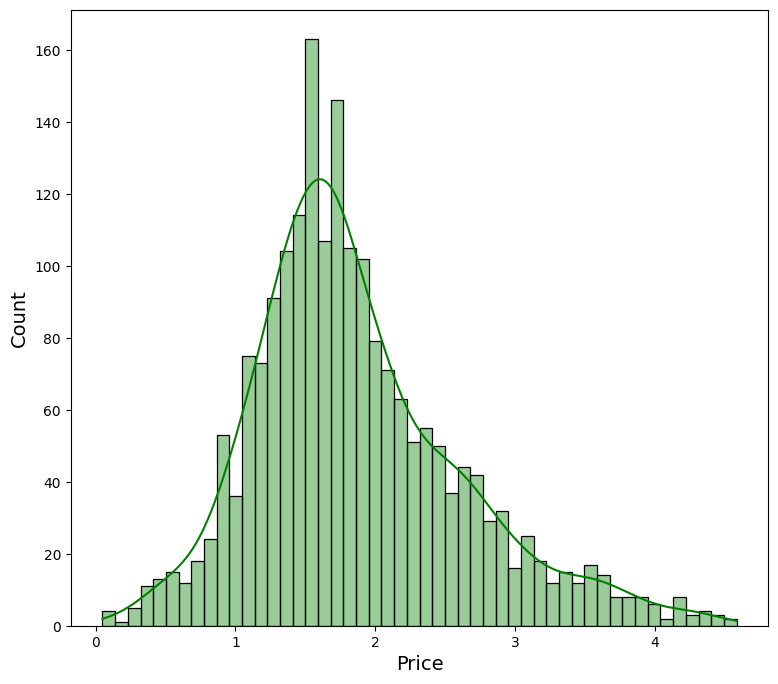

In [16]:
plt.figure(figsize=(9,8))
sns.histplot(housing['Price'], bins = 50, color = 'g', kde = True, alpha = 0.4)

<Axes: xlabel='Diện tích (m2)', ylabel='Count'>

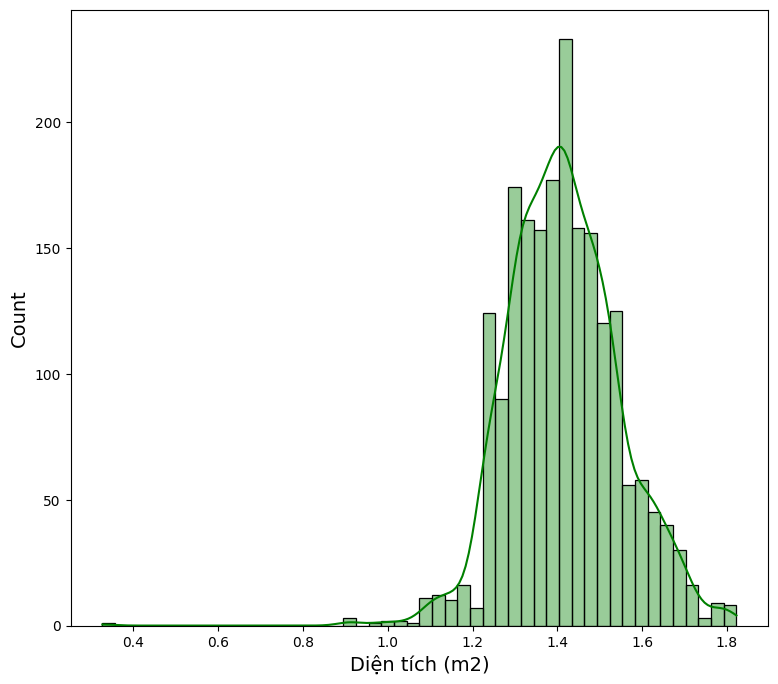

In [17]:
plt.figure(figsize=(9,8))
sns.histplot(np.log(housing['Diện tích (m2)']), bins = 50, color = 'g', kde = True, alpha = 0.4)

<Axes: xlabel='Diện tích sử dụng', ylabel='Count'>

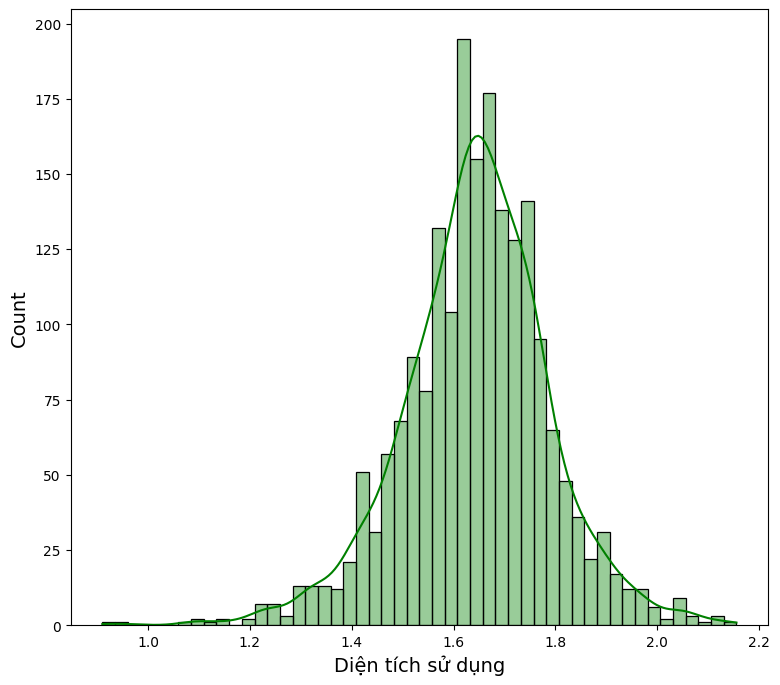

In [18]:
plt.figure(figsize=(9,8))
sns.histplot(np.log(housing['Diện tích sử dụng']), bins = 50, color = 'g', kde = True, alpha = 0.4)

Trực quan hóa dữ liệu `Price` để xác định các outliers và phân phối của dữ liệu:

<Axes: xlabel='Price'>

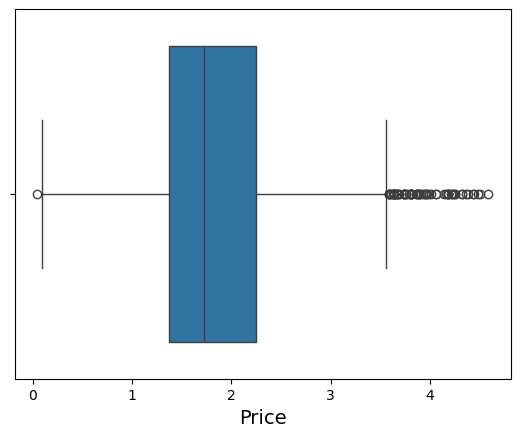

In [19]:
sns.boxplot(x=housing['Price'])

Dựa trên hình ảnh histogram và đường cong mật độ xác suất, có thể nhận xét về phân phối giá nhà như sau:

+ Phân phối lệch phải: Histogram cho thấy phân phối giá nhà có xu hướng lệch phải, nghĩa là có một “đuôi” kéo dài về phía giá cao. Điều này cho thấy số lượng nhà có giá thấp nhiều hơn so với nhà có giá cao.
+ Tập trung giá thấp: Phần lớn các ngôi nhà tập trung ở khoảng giá thấp, được biểu thị bằng các cột cao ở phía bên trái của histogram.
+ Nhà giá cao ít hơn: Số lượng nhà có giá cao hơn là ít và phân tán, như thể hiện bởi các cột thấp hơn ở phía bên phải của histogram. Ta có thể xem xét các ngôi nhà có giá cao hơn $\exp(4)$ tỷ đồng là các ngoại lệ (outliers).
+ Mô hình phân phối: Đường cong mật độ xác suất cố gắng khớp với dữ liệu quan sát và có thể giúp xác định các thông số thống kê như trung bình, trung vị, và độ lệch chuẩn của phân phối giá nhà.

***Mở rộng***. Cùng xem các cột dữ liệu khác phân phối như thế nào:

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Diện tích (m2)'}>,
        <Axes: title={'center': 'Số phòng ngủ'}>],
       [<Axes: title={'center': 'Số phòng WC'}>,
        <Axes: title={'center': 'Số tầng'}>,
        <Axes: title={'center': 'Diện tích sử dụng'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Cluster'}>],
       [<Axes: title={'center': 'Distance to center'}>, <Axes: >,
        <Axes: >]], dtype=object)

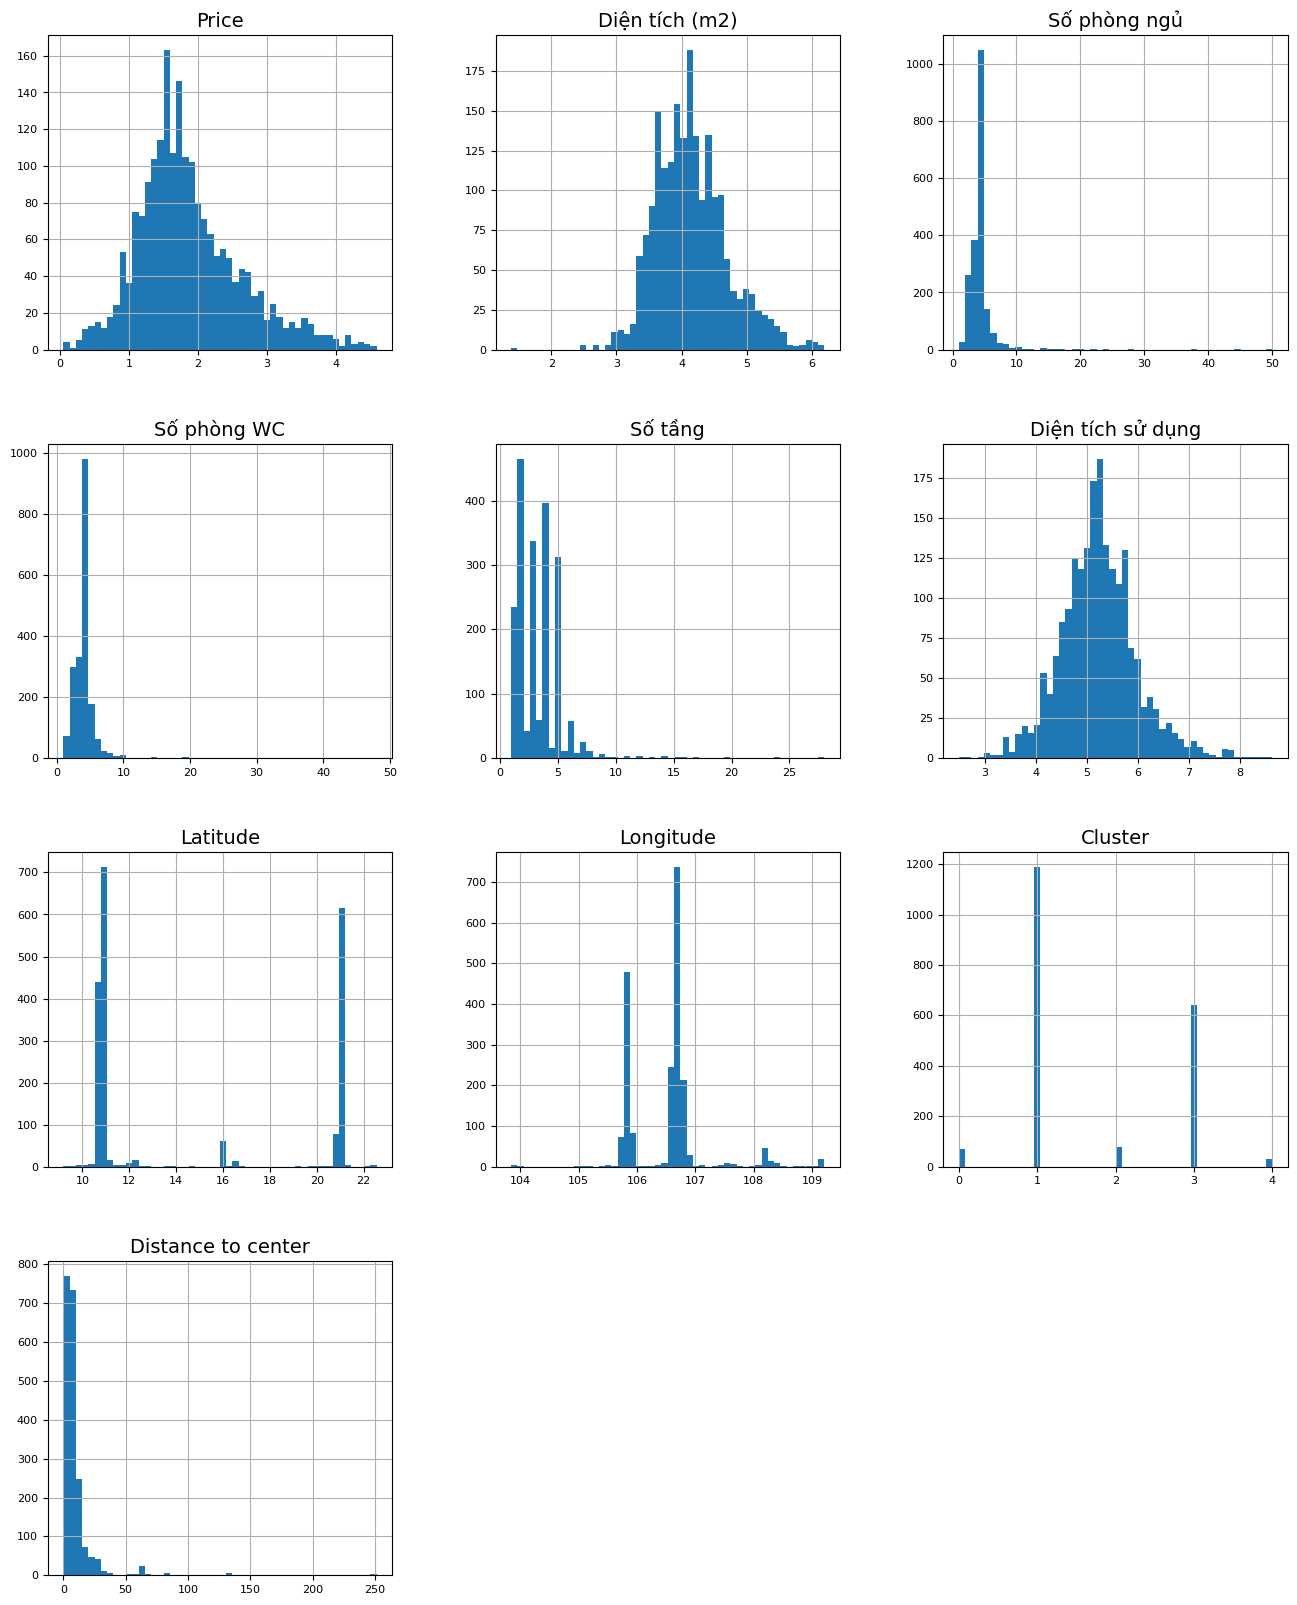

In [20]:
housing.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## 4. Feature Selecting

Do `Price` là biến mục tiêu, ta sẽ tìm mối tương quan giữa `Price` và các biến độc lập còn lại.

Ta sẽ tiến hành loại bỏ các outliers của `Price`:

In [21]:
# Drop outliers of the numerical features in the dataset `housing`
housing = drop_outliers(housing, 'Price')
housing

,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Mặt tiền,Số tầng,Diện tích sử dụng,Latitude,Longitude,Cluster,Distance to center
0,1.648659,4.382027,4.0,3.0,False,False,False,True,2.0,5.075174,10.845619,106.664794,1,4.527418
1,1.504077,3.737670,2.0,2.0,False,False,False,False,3.0,4.836282,10.846876,106.651269,1,5.408283
2,1.458615,3.663562,4.0,4.0,True,False,False,False,5.0,5.273000,21.073970,105.790872,3,6.394044
3,1.163151,3.401197,4.0,4.0,False,False,False,False,2.4,4.276666,21.046133,105.824627,3,3.131665
4,1.568616,4.007333,4.0,3.0,True,False,True,False,4.0,5.393628,10.774058,106.647478,1,5.325425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,2.639057,4.499810,5.0,4.2,True,False,True,True,5.0,6.109248,20.998485,105.868663,3,6.283848
3790,1.504077,5.075174,3.0,3.0,True,False,True,False,1.2,5.257495,9.187031,105.154011,1,245.925794
3799,1.163151,4.110874,4.0,4.0,False,False,True,False,1.4,4.447346,10.972752,106.739906,1,19.360219
3805,1.774952,3.871201,4.0,5.0,True,False,True,False,5.0,5.480639,20.861873,106.666248,0,1.681189


<Axes: xlabel='Price', ylabel='Count'>

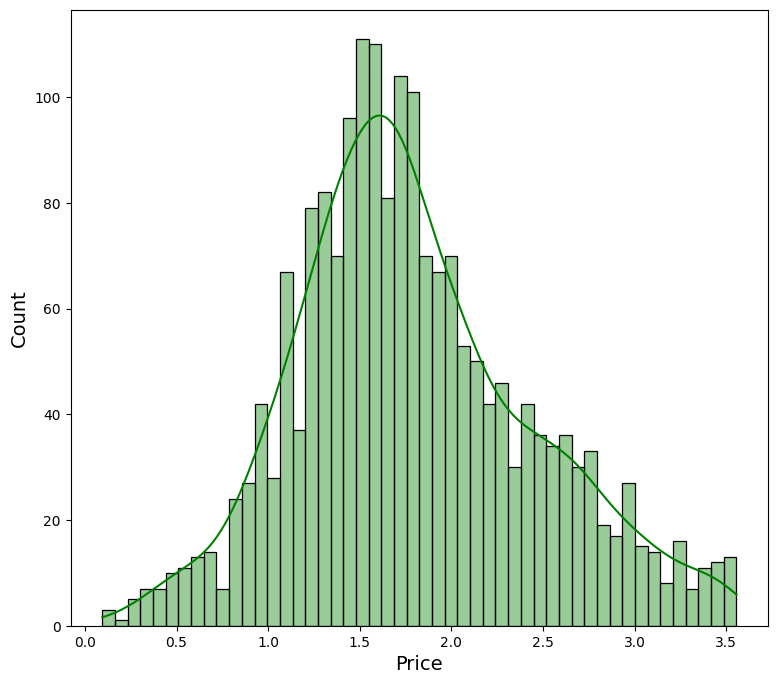

In [22]:
plt.figure(figsize=(9,8))
sns.histplot(housing['Price'], bins = 50, color = 'g', kde = True, alpha = 0.4)

Tiếp theo, ta sẽ thực hiện chuyển đổi dữ liệu dạng chuỗi sang dạng số và tổng hợp dữ liệu:

In [23]:
# replace True with 1 and False with 0
housing = convert_boolean_to_numeric(housing, ['Chỗ để xe hơi', 'Đang cho thuê', 'CSVC xung quanh', 'Mặt tiền'])
housing

/home/letruongzzio/Desktop/OutliersScale.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({True: 1, False: 0})
/home/letruongzzio/Desktop/OutliersScale.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace({True: 1, False: 0})


,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Mặt tiền,Số tầng,Diện tích sử dụng,Latitude,Longitude,Cluster,Distance to center
0,1.648659,4.382027,4.0,3.0,0,0,0,1,2.0,5.075174,10.845619,106.664794,1,4.527418
1,1.504077,3.737670,2.0,2.0,0,0,0,0,3.0,4.836282,10.846876,106.651269,1,5.408283
2,1.458615,3.663562,4.0,4.0,1,0,0,0,5.0,5.273000,21.073970,105.790872,3,6.394044
3,1.163151,3.401197,4.0,4.0,0,0,0,0,2.4,4.276666,21.046133,105.824627,3,3.131665
4,1.568616,4.007333,4.0,3.0,1,0,1,0,4.0,5.393628,10.774058,106.647478,1,5.325425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,2.639057,4.499810,5.0,4.2,1,0,1,1,5.0,6.109248,20.998485,105.868663,3,6.283848
3790,1.504077,5.075174,3.0,3.0,1,0,1,0,1.2,5.257495,9.187031,105.154011,1,245.925794
3799,1.163151,4.110874,4.0,4.0,0,0,1,0,1.4,4.447346,10.972752,106.739906,1,19.360219
3805,1.774952,3.871201,4.0,5.0,1,0,1,0,5.0,5.480639,20.861873,106.666248,0,1.681189


In [24]:
housing = apply_floor(housing, ['Số phòng ngủ', 'Số phòng WC', 'Số tầng'])
housing = compute_rooms(housing)
housing = compute_features(housing)

housing

/home/letruongzzio/Desktop/OutliersScale.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = np.floor(df[columns])
/home/letruongzzio/Desktop/OutliersScale.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rooms'] = df['Số phòng ngủ'] + df['Số phòng WC']
/home/letruongzzio/Desktop/OutliersScale.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Mặt tiền,Số tầng,Diện tích sử dụng,Latitude,Longitude,Cluster,Distance to center,Rooms,Features
0,1.648659,4.382027,4.0,3.0,0,0,0,1,2.0,5.075174,10.845619,106.664794,1,4.527418,7.0,1
1,1.504077,3.737670,2.0,2.0,0,0,0,0,3.0,4.836282,10.846876,106.651269,1,5.408283,4.0,0
2,1.458615,3.663562,4.0,4.0,1,0,0,0,5.0,5.273000,21.073970,105.790872,3,6.394044,8.0,1
3,1.163151,3.401197,4.0,4.0,0,0,0,0,2.0,4.276666,21.046133,105.824627,3,3.131665,8.0,0
4,1.568616,4.007333,4.0,3.0,1,0,1,0,4.0,5.393628,10.774058,106.647478,1,5.325425,7.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,2.639057,4.499810,5.0,4.0,1,0,1,1,5.0,6.109248,20.998485,105.868663,3,6.283848,9.0,3
3790,1.504077,5.075174,3.0,3.0,1,0,1,0,1.0,5.257495,9.187031,105.154011,1,245.925794,6.0,2
3799,1.163151,4.110874,4.0,4.0,0,0,1,0,1.0,4.447346,10.972752,106.739906,1,19.360219,8.0,1
3805,1.774952,3.871201,4.0,5.0,1,0,1,0,5.0,5.480639,20.861873,106.666248,0,1.681189,9.0,2


Tới đây, tôi sẽ thực hiện đổi tên và sắp xếp lại DataFrame cho dễ quan sát:

In [25]:
housing = transform_housing_data(housing)

housing

/home/letruongzzio/Desktop/OutliersScale.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={
/home/letruongzzio/Desktop/OutliersScale.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = range(1, len(df) + 1)


,ID,Cluster,Log price (1 billion VND),Log area (square meters),Log usable area (square meters),Rooms,Bedrooms,WC,Number of floors,Parking,For rent,Facade,Infrastructure,Features,Latitude,Longitude,Distance to center
0,1,1,1.648659,4.382027,5.075174,7.0,4.0,3.0,2.0,0,0,1,0,1,10.845619,106.664794,4.527418
1,2,1,1.504077,3.737670,4.836282,4.0,2.0,2.0,3.0,0,0,0,0,0,10.846876,106.651269,5.408283
2,3,3,1.458615,3.663562,5.273000,8.0,4.0,4.0,5.0,1,0,0,0,1,21.073970,105.790872,6.394044
3,4,3,1.163151,3.401197,4.276666,8.0,4.0,4.0,2.0,0,0,0,0,0,21.046133,105.824627,3.131665
4,5,1,1.568616,4.007333,5.393628,7.0,4.0,3.0,4.0,1,0,0,1,2,10.774058,106.647478,5.325425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,1931,3,2.639057,4.499810,6.109248,9.0,5.0,4.0,5.0,1,0,1,1,3,20.998485,105.868663,6.283848
3790,1932,1,1.504077,5.075174,5.257495,6.0,3.0,3.0,1.0,1,0,0,1,2,9.187031,105.154011,245.925794
3799,1933,1,1.163151,4.110874,4.447346,8.0,4.0,4.0,1.0,0,0,0,1,1,10.972752,106.739906,19.360219
3805,1934,0,1.774952,3.871201,5.480639,9.0,4.0,5.0,5.0,1,0,0,1,2,20.861873,106.666248,1.681189


## 5. Tìm mối tương quan

In [36]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['Log price (1 billion VND)'].sort_values(ascending=False)

Log price (1 billion VND)          1.000000
Log usable area (square meters)    0.561064
Log area (square meters)           0.461102
Rooms                              0.333010
WC                                 0.322041
Bedrooms                           0.312519
Number of floors                   0.310217
Facade                             0.253021
Features                           0.187632
For rent                           0.135557
Latitude                           0.088961
Cluster                            0.054189
Parking                            0.050828
ID                                -0.019793
Longitude                         -0.040900
Infrastructure                    -0.051266
Distance to center                -0.096661
Name: Log price (1 billion VND), dtype: float64

<Axes: >

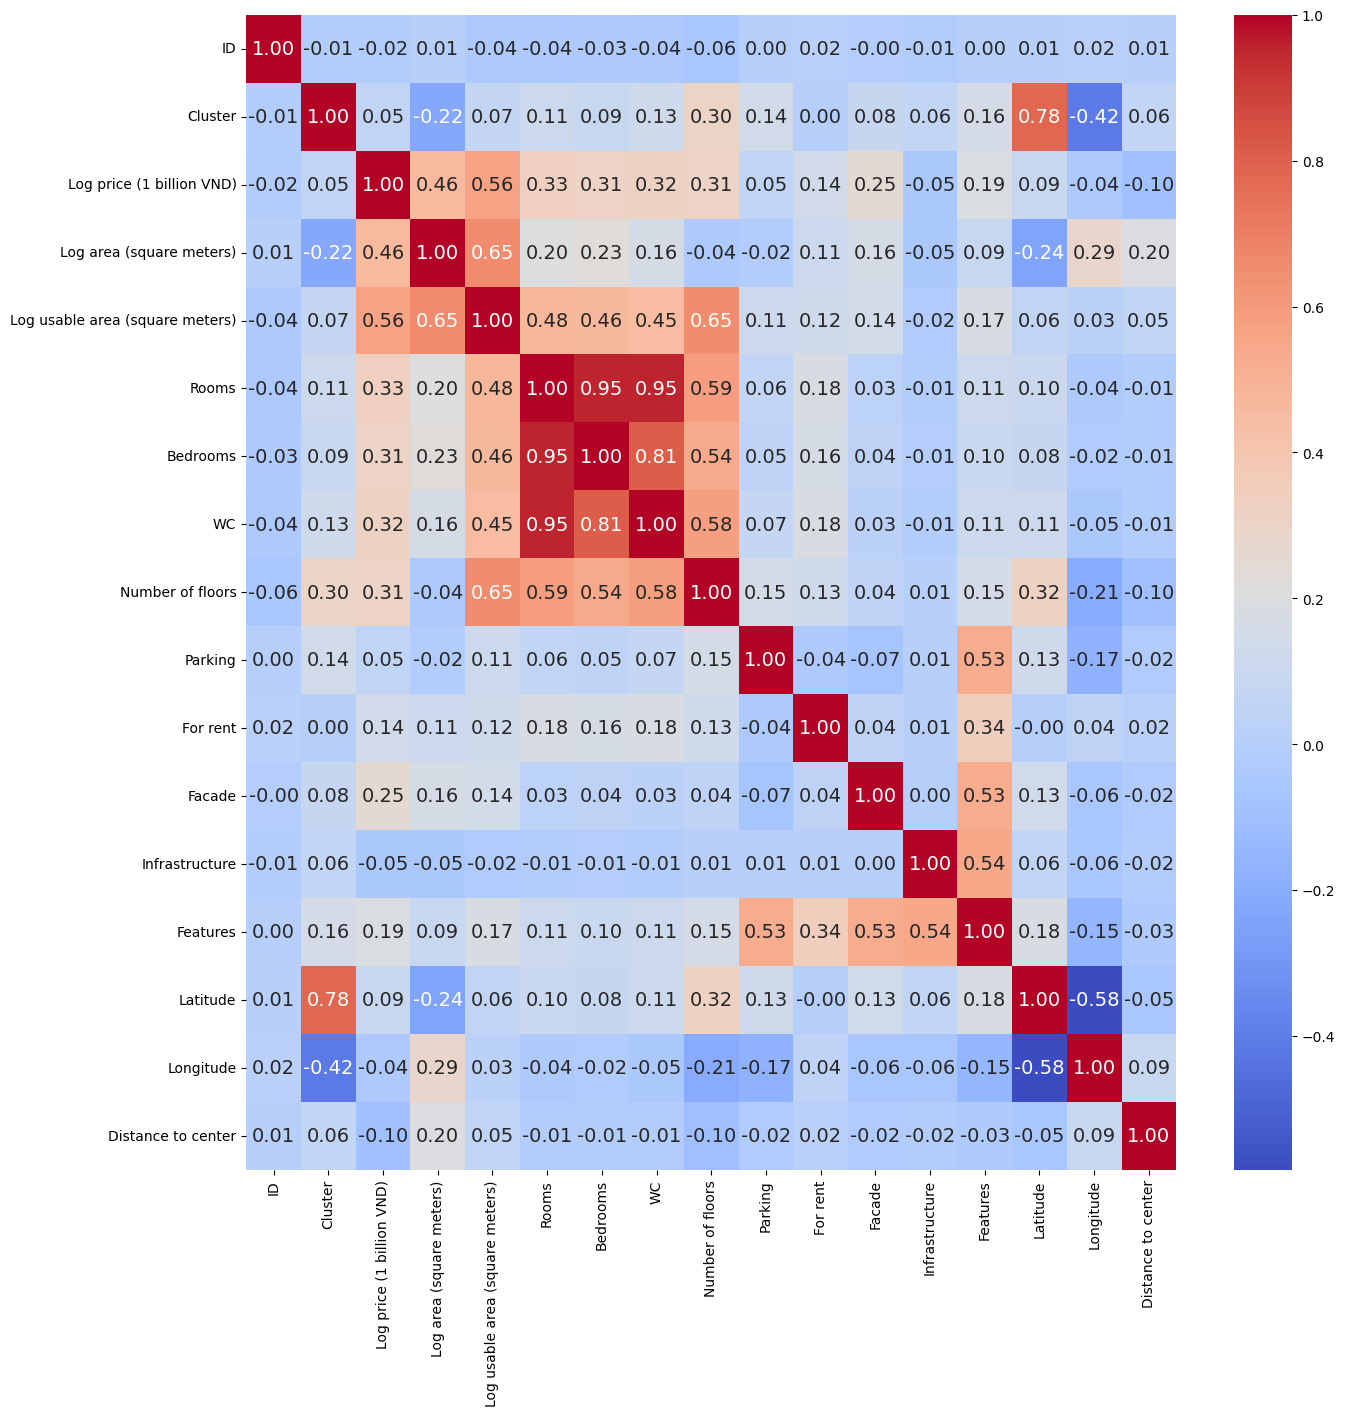

In [39]:
# Just draw the coeeficient of correlation greater than 0
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [40]:
housing

,ID,Cluster,Log price (1 billion VND),Log area (square meters),Log usable area (square meters),Rooms,Bedrooms,WC,Number of floors,Parking,For rent,Facade,Infrastructure,Features,Latitude,Longitude,Distance to center,Log usable area cat
0,1,1,1.648659,4.382027,5.075174,7.0,4.0,3.0,2.0,0,0,1,0,1,10.845619,106.664794,4.527418,3
1,2,1,1.504077,3.737670,4.836282,4.0,2.0,2.0,3.0,0,0,0,0,0,10.846876,106.651269,5.408283,2
2,3,3,1.458615,3.663562,5.273000,8.0,4.0,4.0,5.0,1,0,0,0,1,21.073970,105.790872,6.394044,3
3,4,3,1.163151,3.401197,4.276666,8.0,4.0,4.0,2.0,0,0,0,0,0,21.046133,105.824627,3.131665,2
4,5,1,1.568616,4.007333,5.393628,7.0,4.0,3.0,4.0,1,0,0,1,2,10.774058,106.647478,5.325425,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,1931,3,2.639057,4.499810,6.109248,9.0,5.0,4.0,5.0,1,0,1,1,3,20.998485,105.868663,6.283848,3
3790,1932,1,1.504077,5.075174,5.257495,6.0,3.0,3.0,1.0,1,0,0,1,2,9.187031,105.154011,245.925794,3
3799,1933,1,1.163151,4.110874,4.447346,8.0,4.0,4.0,1.0,0,0,0,1,1,10.972752,106.739906,19.360219,2
3805,1934,0,1.774952,3.871201,5.480639,9.0,4.0,5.0,5.0,1,0,0,1,2,20.861873,106.666248,1.681189,3


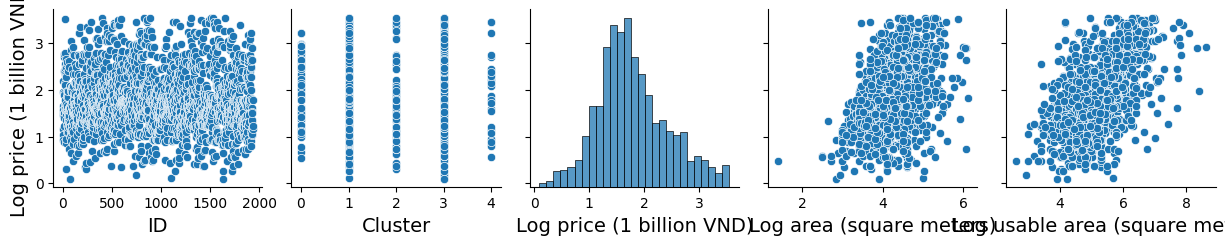

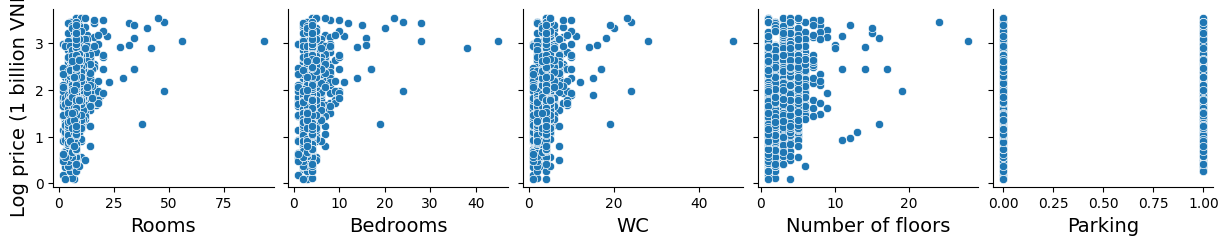

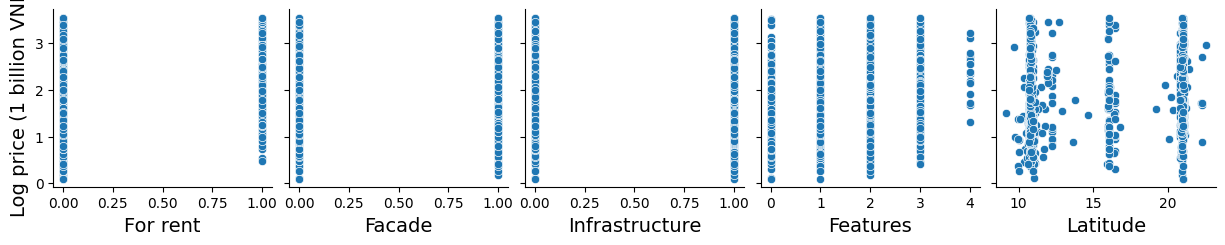

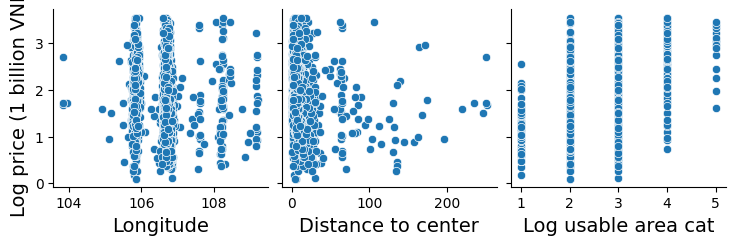

In [45]:
for i in range(0, len(housing.columns), 5):
    sns.pairplot(data=housing,
                x_vars=(housing.columns[i:i+5]),
                y_vars=['Log price (1 billion VND)'],
                kind='scatter')

Dựa trên biểu đồ về sự tương quan trên, tôi có một số phân tích về mối tương quan giữa các biến trong bộ dữ liệu đối với `Price`:

+ Phân phối giá: Biểu đồ histogram cho `Log price (1 billion VND)` cho thấy phân phối giá của bất động sản có hình dạng chuẩn và lệch trái, điều này chỉ ra rằng hầu như phần lớn các ngôi nhà có giá thấp hơn $3$ tỷ VND.
+ Diện tích sử dụng: Scatter plot giữa `Log usable area (square meters)` và `Log price (1 billion VND)` có thể cho thấy mối quan hệ tuyến tính giữa hai biến này.
+ Số phòng: Scatter plot giữa `Rooms` và `Log price (1 billion VND)` sẽ phản ánh mối liên hệ giữa số lượng phòng và giá bất động sản. Mối quan hệ này gần như là phi tuyến.

Thêm cột `ID` vào dữ liệu để phân biệt các căn nhà:

In [46]:
housing.to_csv('housing_sample.csv', sep='\t', index=False)

## 6. Tạo train set và test set


Ta sẽ chia tập dữ liệu thành các đoạn bằng nhau dựa trên thuộc tính có tương quan cao nhất với `Price` là `Price per m2_1` để khi tạo train set và test set thì sẽ giúp cho 2 tập này có sự phân bố dữ liệu tương tự nhau:

In [31]:
housing["Log usable area cat"] = pd.cut(housing["Log usable area (square meters)"], bins=[2.61, 3.816, 5.022, 6.228, 7.434, 8.64], labels=[1, 2, 3, 4, 5])

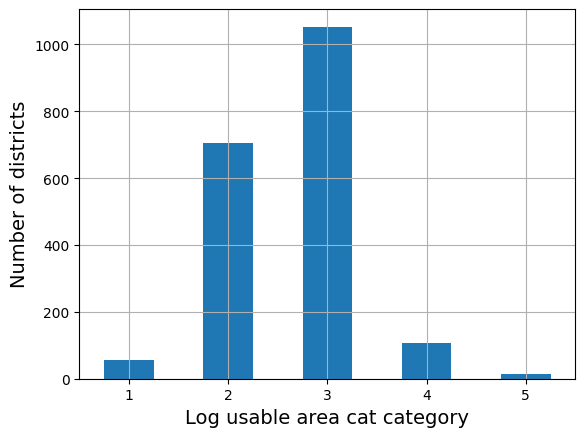

In [32]:
housing["Log usable area cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Log usable area cat category")
plt.ylabel("Number of districts")
plt.show()

Ta sẽ lấy 80% của bộ dữ liệu cho train set và 20% cho test set:

In [47]:
train_set, test_set = train_test_split(housing, test_size=0.2, stratify=housing["Log usable area cat"], random_state=42)

Ta sẽ drop `Log usable area cat` vì không cần dùng đến nữa:

In [48]:
for set in (train_set, test_set):
    set.drop("Log usable area cat", axis=1, inplace=True)

housing.drop("Log usable area cat", axis=1, inplace=True)
housing

,ID,Cluster,Log price (1 billion VND),Log area (square meters),Log usable area (square meters),Rooms,Bedrooms,WC,Number of floors,Parking,For rent,Facade,Infrastructure,Features,Latitude,Longitude,Distance to center
0,1,1,1.648659,4.382027,5.075174,7.0,4.0,3.0,2.0,0,0,1,0,1,10.845619,106.664794,4.527418
1,2,1,1.504077,3.737670,4.836282,4.0,2.0,2.0,3.0,0,0,0,0,0,10.846876,106.651269,5.408283
2,3,3,1.458615,3.663562,5.273000,8.0,4.0,4.0,5.0,1,0,0,0,1,21.073970,105.790872,6.394044
3,4,3,1.163151,3.401197,4.276666,8.0,4.0,4.0,2.0,0,0,0,0,0,21.046133,105.824627,3.131665
4,5,1,1.568616,4.007333,5.393628,7.0,4.0,3.0,4.0,1,0,0,1,2,10.774058,106.647478,5.325425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,1931,3,2.639057,4.499810,6.109248,9.0,5.0,4.0,5.0,1,0,1,1,3,20.998485,105.868663,6.283848
3790,1932,1,1.504077,5.075174,5.257495,6.0,3.0,3.0,1.0,1,0,0,1,2,9.187031,105.154011,245.925794
3799,1933,1,1.163151,4.110874,4.447346,8.0,4.0,4.0,1.0,0,0,0,1,1,10.972752,106.739906,19.360219
3805,1934,0,1.774952,3.871201,5.480639,9.0,4.0,5.0,5.0,1,0,0,1,2,20.861873,106.666248,1.681189


In [49]:
train_set.to_csv('train_set.csv', index = False, sep = '\t')
test_set.to_csv('test_set.csv', index = False, sep = '\t')